In [ ]:
print ("hello")

hello


11501568/11490434 [==============================] - 0s 0us/step
train_images shape:  (60000, 28, 28)
train_labels shape:  (60000,)
test_images shape:  (10000, 28, 28)
test_labels shape:  (10000,)


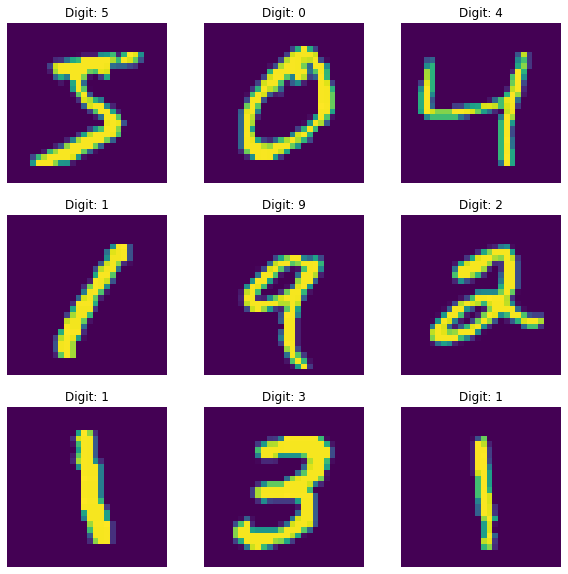

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()
# Printing the shapes
print("train_images shape: ", train_images.shape) # This provides the dimensions of the images (pixels)
print("train_labels shape: ", train_labels.shape)
print("test_images shape: ", test_images.shape)
print("test_labels shape: ", test_labels.shape)

 
# Displaying first 9 images of dataset
fig = plt.figure(figsize=(10,10))  # This creates a figure and sets its size
 

# This sets the dimensions of how the images are arranged together
nrows=3 
ncols=3


for i in range(9): # The "for loop" goes through each element in the numpy array of digits
  fig.add_subplot(nrows, ncols, i+1) # This allows for side by side images
  plt.imshow(train_images[i]) # This creates an image from a 2 dimensional numpy array
  plt.title("Digit: {}".format(train_labels[i])) # This displays the digit title above the image
  plt.axis(False)
plt.show()


In [ ]:
import cv2 # This is for "computer vision"
import numpy as np
import matplotlib.pyplot as plt #This is for visualisation of digits
import tensorflow as tf
import os

# This is where pre-processing begins
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()

# The following three lines adds three layers of neurons
# 28x28 pixels
# Flatten turns into 28x28=784 pixels (one layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # this collapses the spatial dimensions of the input into channel dimension
# This layer has 128 neurons
model.add(tf.keras.layers.Dense(128, activation="relu")) # a dense layer is a layer that is deeply connected with its preceeding layer
#Dense layer also means that the neurons of the layer are connected to every neuron of its preceeding layer
# Here, activation function is added. relu is the activation function (rectify every linear unit)
model.add(tf.keras.layers.Dense(128, activation="relu"))

# Softmax gives the probability for each digit to be the right answer
# This is the output layer (which has 10 neurons)
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# optmizer tells the model how to update the weights/parameters of the model
# Loss function tells model how to find the error 
# Metrics constains list of metrics used to monitor the train and test steps
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# mode.fit trains the neural network
# The epoch states how many times the model can see the data. This is essentially the amount of "training"
model.fit(x_train, y_train, epochs=3)

model.save("Handwritten_model")


loss, accuracy = model.evaluate(x_test, y_test)
print (loss)
print (accuracy)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2611 - accuracy: 0.9241
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1069 - accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9723
0.09190362691879272
0.9722999930381775


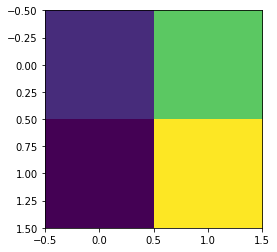

In [ ]:
# This is my training program

In [ ]:
import cv2 # This is for "computer vision"
import numpy as np
import matplotlib.pyplot as plt #This is for visualisation of digits
import tensorflow as tf
import os

# This is where pre-processing begins
#mnist = tf.keras.datasets.mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

#model = tf.keras.models.Sequential()

# The following three lines adds three layers of neurons
# 28x28 pixels
# Flatten turns into 28x28=784 pixels (one layer)
#model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # this collapses the spatial dimensions of the input into channel dimension
# This layer has 128 neurons
#model.add(tf.keras.layers.Dense(128, activation="relu")) # a dense layer is a layer that is deeply connected with its preceeding layer
#Dense layer also means that the neurons of the layer are connected to every neuron of its preceeding layer
# Here, activation function is added. relu is the activation function (rectify every linear unit)
#model.add(tf.keras.layers.Dense(128, activation="relu"))

# Softmax gives the probability for each digit to be the right answer
# This is the output layer (which has 10 neurons)
#model.add(tf.keras.layers.Dense(10, activation="softmax"))

# optmizer tells the model how to update the weights/parameters of the model
# Loss function tells model how to find the error 
# Metrics constains list of metrics used to monitor the train and test steps
#model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# mode.fit trains the neural network
# The epoch states how many times the model can see the data. This is essentially the amount of "training"
#model.fit(x_train, y_train, epochs=3)

#model.save("Handwritten_model")

image_number = 1

#img = cv2.imread("MEGA/TEST_IMAGE.jpg")
#img = np.invert(np.array(img))



# This will give the digit for activation function
model = tf.keras.models.load_model("Handwritten_model")

#print ("This number is probably a {np.argmax(prediction)}")
#plt.imshow(img[0], cmap=plt.cm.binary)
#plt.show()





while os.path.isfile("MEGA/TEST_IMAGE.jpg"):
  try:
    img = cv2.iread("MEGA/TEST_IMAGE.jpg")
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print (f"This is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print ("ERROR")
  finally:
    print ("OKAY")




#print (loss)
#print (accuracy)

OSError: ignored